# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import json
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
city_len = len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units='imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
world = []
num = []

# Build query URL
for i in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + str(i)+"&units="+units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    world.append(weather_json)
#     num.append(weather_json[0]['sys']['id'])
    print(f"The API is getting weather info for {i} now.")
    
# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")    






The API is getting weather info for kalakamati now.
The API is getting weather info for kapaa now.
The API is getting weather info for alofi now.
The API is getting weather info for chuy now.
The API is getting weather info for rikitea now.
The API is getting weather info for port elizabeth now.
The API is getting weather info for barrow now.
The API is getting weather info for belomorsk now.
The API is getting weather info for lagoa now.
The API is getting weather info for hithadhoo now.
The API is getting weather info for airai now.
The API is getting weather info for ushuaia now.
The API is getting weather info for souillac now.
The API is getting weather info for jalu now.
The API is getting weather info for usinsk now.
The API is getting weather info for mataura now.
The API is getting weather info for cape town now.
The API is getting weather info for taman now.
The API is getting weather info for natal now.
The API is getting weather info for almaznyy now.
The API is getting wea

In [4]:
city = []
name = []
temps = []
max_temp = []
min_temp = []
winds = []
cloudy = []
humidity = []
lat = []
long = []

for i in range(1,len(world)):
    try:
#         print(world[i]['main']['temp_min'])
        min_temp.append(world[i]['main']['temp_min'])
#         print(world[i]['main']['temp_max'])
        max_temp.append(world[i]['main']['temp_max'])
#         print(world[i]['main']['temp'])
        temps.append(world[i]['main']['temp'])
#         print(world[i]['main']['humidity'])
        humidity.append(world[i]['main']['humidity'])
#         print(world[i]['name'])
        city.append(world[i]['name'])
        cloudy.append(world[i]['clouds']['all'])
        winds.append(world[i]['wind']['speed'])
        lat.append(world[i]['coord']['lat'])
        long.append(world[i]['coord']['lon'])
    except KeyError:
        print("Oops, that key doesn't exist.")
        pass


Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Oops, that

In [5]:
print(json.dumps(world[0]['coord'], sort_keys=True, indent=4))

{
    "lat": -20.5929,
    "lon": 27.3121
}


In [6]:
lat

[22.0752,
 -19.0595,
 -33.6971,
 -23.1203,
 -33.918,
 71.2906,
 64.5232,
 39.05,
 -0.6,
 -8.9266,
 -54.8,
 -20.5167,
 29.0331,
 65.9939,
 -46.1927,
 -33.9258,
 45.2117,
 -5.795,
 48.0448,
 -46.6,
 -9.8,
 -39.5917,
 46.6166,
 -34.5322,
 19.7297,
 -21.3393,
 55.7435,
 4.4148,
 -3.8004,
 29.9697,
 -21.35,
 27.9769,
 -53.15,
 -21.3585,
 41.8825,
 42.097,
 -24.8667,
 -33.65,
 71.6872,
 68.5333,
 0.8,
 -2.0226,
 42.6001,
 63.8424,
 -37.8333,
 57.6464,
 -42.8794,
 -21.2,
 -38.0023,
 -2.5744,
 14.8961,
 69.7008,
 13.4667,
 68.75,
 57.79,
 -34.4187,
 -4.3167,
 35.9911,
 -7.95,
 -42.7826,
 -6.4333,
 18.2164,
 -20.3428,
 -10.4389,
 -33.5906,
 35.0806,
 54.1502,
 40.1836,
 -19.9842,
 45.362,
 -22.9661,
 -13.7,
 64.8945,
 60.4167,
 61.0064,
 46.4856,
 33.994,
 -38.2667,
 4.5167,
 78.2186,
 -16.4833,
 71.9667,
 47.6666,
 59.7035,
 41.3712,
 60.7522,
 -46.1333,
 36.2133,
 -20.4081,
 -24.7911,
 47.8667,
 60.1432,
 70.3705,
 -35.85,
 -20.7833,
 63.7506,
 -18.5933,
 -28.55,
 -0.7393,
 -17,
 32.6667,
 -2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({"city":city, "Temps":temps,"Max Temp":max_temp, "Min Temp":min_temp,"Cloudy":cloudy,"Humidity":humidity, "Winds":winds,"Latitude":lat,"Longitude":long})
weather_df.to_csv("../output_data/city_weather.csv")

# print(f"City Length {len(city)}, Temps Length {len(temps)} Max Temp Len {len(max_temp)}, {len(min_temp)} , {len(cloudy)}, {len(humidity)}")

In [8]:
weather_df



,city,Temps,Max Temp,Min Temp,Cloudy,Humidity,Winds,Latitude,Longitude
0,Kapaa,71.26,71.60,71.01,75,73,23.02,22.0752,-159.3190
1,Alofi,73.40,73.40,73.40,100,100,10.36,-19.0595,-169.9187
2,Chui,62.89,62.89,62.89,5,85,5.46,-33.6971,-53.4616
3,Rikitea,80.65,80.65,80.65,19,70,6.06,-23.1203,-134.9692
4,Port Elizabeth,66.20,66.20,66.20,0,72,4.61,-33.9180,25.5701
...,...,...,...,...,...,...,...,...,...
548,Teguise,57.20,57.20,57.20,20,67,10.36,29.0605,-13.5640
549,Saint-Louis,66.29,66.29,66.29,0,36,8.72,16.3333,-15.0000
550,San Jerónimo,48.13,48.13,48.13,100,90,1.74,-11.9472,-75.2829
551,Terney,38.71,38.71,38.71,100,60,13.60,45.0503,136.6092


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:


newdf = weather_df[(weather_df.Humidity > 100)]
newdf

,city,Temps,Max Temp,Min Temp,Cloudy,Humidity,Winds,Latitude,Longitude


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
?time

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

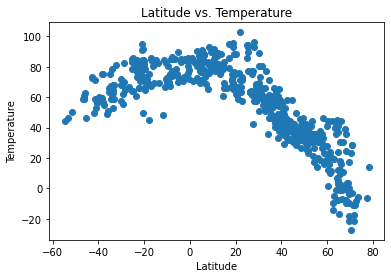

In [13]:
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(weather_df['Latitude'], weather_df['Temps'])


## Latitude vs. Humidity Plot

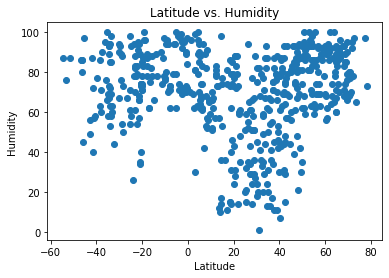

In [14]:
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])


## Latitude vs. Cloudiness Plot

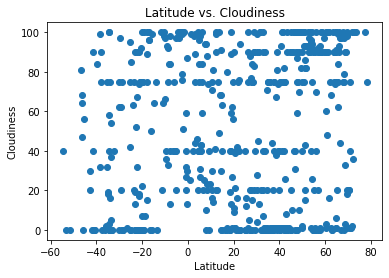

In [15]:
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weather_df['Latitude'], weather_df['Cloudy'])


## Latitude vs. Wind Speed Plot

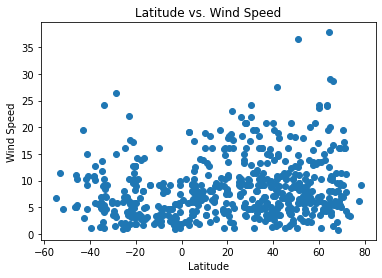

In [16]:
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(weather_df['Latitude'], weather_df['Winds'])


## Linear Regression

In [17]:
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  #

# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

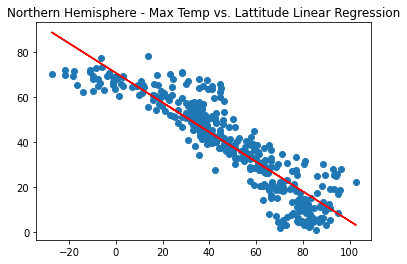

In [20]:
Nlat = weather_df[(weather_df.Latitude > 0)]

X = Nlat[['Max Temp']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Northern Hemisphere - Max Temp vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

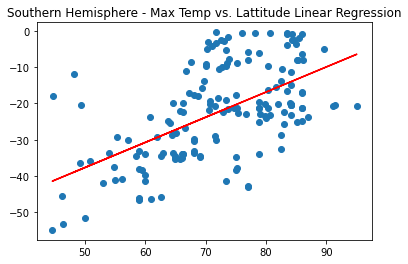

In [22]:
Nlat = weather_df[(weather_df.Latitude < 0)]

X = Nlat[['Max Temp']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Southern Hemisphere - Max Temp vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

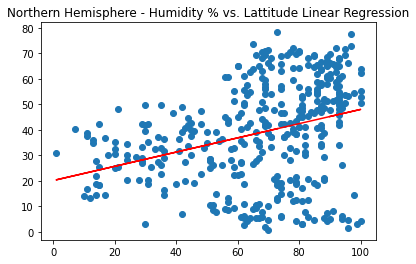

In [23]:
Nlat = weather_df[(weather_df.Latitude > 0)]

X = Nlat[['Humidity']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Northern Hemisphere - Humidity % vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

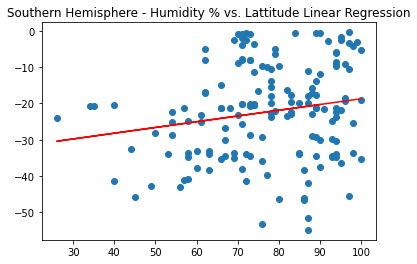

In [24]:
Nlat = weather_df[(weather_df.Latitude < 0)]

X = Nlat[['Humidity']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Southern Hemisphere - Humidity % vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

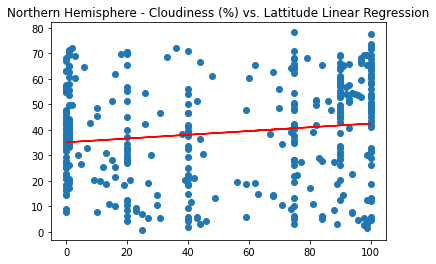

In [26]:
Nlat = weather_df[(weather_df.Latitude > 0)]

X = Nlat[['Cloudy']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Northern Hemisphere - Cloudiness (%) vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

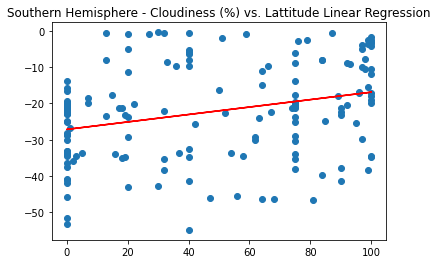

In [28]:
Nlat = weather_df[(weather_df.Latitude < 0)]

X = Nlat[['Cloudy']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Southern Hemisphere - Cloudiness (%) vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

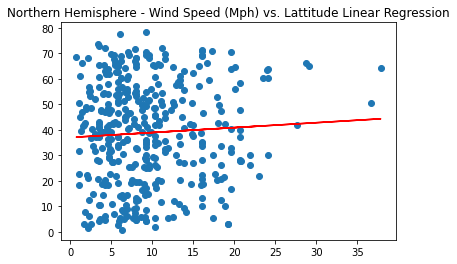

In [27]:
Nlat = weather_df[(weather_df.Latitude > 0)]

X = Nlat[['Winds']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Northern Hemisphere - Wind Speed (Mph) vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

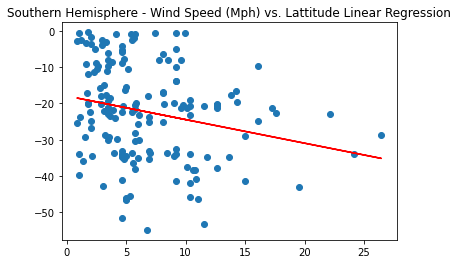

In [29]:
Nlat = weather_df[(weather_df.Latitude < 0)]

X = Nlat[['Winds']]
Y = Nlat['Latitude']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #

plt.title("Southern Hemisphere - Wind Speed (Mph) vs. Lattitude Linear Regression")
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()